In [7]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import os
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.manifold import TSNE
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

<h1>Data Exploration</h1>

<h2>Data Cleaning</h2>

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df = pd.read_excel(r'C:\Users\Rohit Varre\Desktop\MliS\ML lab\Assignment 2\trainDataset.xls')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 120 entries, ID to original_ngtdm_Strength
dtypes: float64(108), int64(11), object(1)
memory usage: 375.1+ KB


In [11]:
df.iloc[:,:13].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             400 non-null    object 
 1   pCR (outcome)                  400 non-null    int64  
 2   RelapseFreeSurvival (outcome)  400 non-null    float64
 3   Age                            400 non-null    float64
 4   ER                             400 non-null    int64  
 5   PgR                            400 non-null    int64  
 6   HER2                           400 non-null    int64  
 7   TrippleNegative                400 non-null    int64  
 8   ChemoGrade                     400 non-null    int64  
 9   Proliferation                  400 non-null    int64  
 10  HistologyType                  400 non-null    int64  
 11  LNStatus                       400 non-null    int64  
 12  TumourStage                    400 non-null    int

In [12]:
# Dropping and rearranging columns
df.drop(['pCR (outcome)'],axis = 1, inplace = True)
cols = list(df.columns)
cols[2],cols[11] = cols[11],cols[2]
temp = cols[1]
cols.remove(temp)
cols.append(temp)
df = df[cols]

<h2>Treating null values</h2>

In [13]:
# The number of null values in a column
null = []
for i in df.columns:
    if 999 in df[i].unique():
        check = df[i].value_counts()[999]
        print(i,check)
        null.append(i)

PgR 1
HER2 1
TrippleNegative 1
ChemoGrade 3
Proliferation 2
HistologyType 3
LNStatus 1


In [14]:
# Replacing the null values by mode as the null values are only in categorical features
for i in null:
    df[i].replace(999,df[i].mode()[0],inplace = True)
df.describe()

,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,RelapseFreeSurvival (outcome)
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,4.000000e+02,400.000000,400.000000,400.000000,40

In [15]:
df.head()

,ID,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,RelapseFreeSurvival (outcome)
0,TRG002174,2,0,0,0,1,3,3,1,1,41.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,

In [16]:
y = pd.DataFrame(df['RelapseFreeSurvival (outcome)'])
X = df.drop(['RelapseFreeSurvival (outcome)','ID'],axis = 1)
X.head()

,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,2,0,0,0,1,3,3,1,1,41.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.438760,0.184265,0.4078

<h2>Data Visualization</h2>

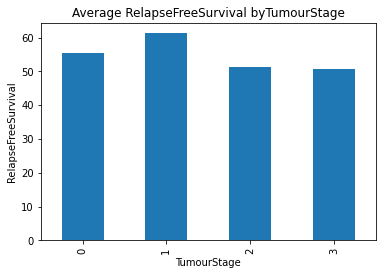

   TumourStage  RelapseFreeSurvival (outcome)
0            1                      55.452381
1            2                      61.232456
2            3                      51.190000
3            4                      50.708333


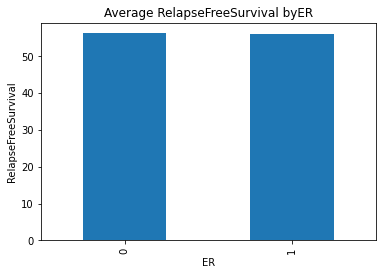

   ER  RelapseFreeSurvival (outcome)
0   0                      56.231431
1   1                      56.098765


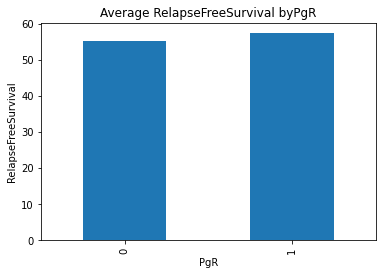

   PgR  RelapseFreeSurvival (outcome)
0    0                      55.341702
1    1                      57.374224


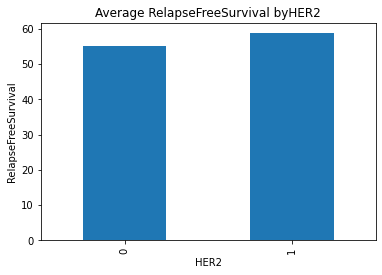

   HER2  RelapseFreeSurvival (outcome)
0     0                      54.998182
1     1                      58.715333


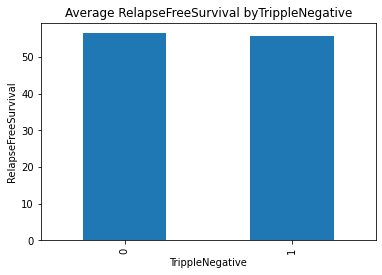

   TrippleNegative  RelapseFreeSurvival (outcome)
0                0                      56.418539
1                1                      55.640351


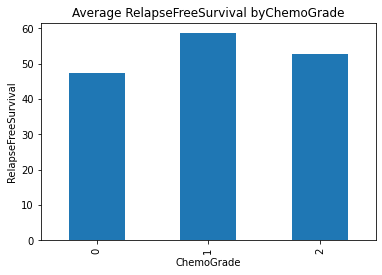

   ChemoGrade  RelapseFreeSurvival (outcome)
0           1                      47.333333
1           2                      58.578723
2           3                      52.780675


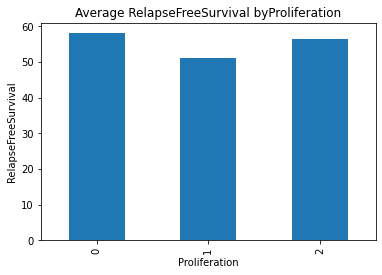

   Proliferation  RelapseFreeSurvival (outcome)
0              1                      58.039548
1              2                      51.194444
2              3                      56.415493


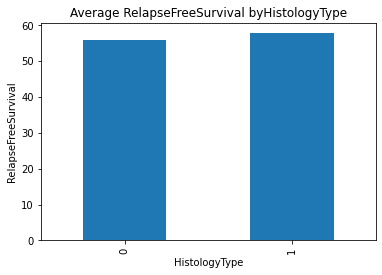

   HistologyType  RelapseFreeSurvival (outcome)
0              1                      55.894380
1              2                      57.790179


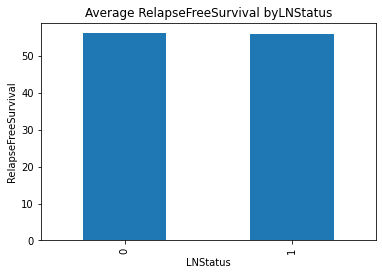

   LNStatus  RelapseFreeSurvival (outcome)
0         0                      56.188802
1         1                      56.133013


In [17]:
# Average RFS value with respect to various categorical features
check = pd.DataFrame
for i,col in enumerate(df.columns[1:10]):
    check = df.groupby(col,as_index=False)['RelapseFreeSurvival (outcome)'].mean()
    check['RelapseFreeSurvival (outcome)'].plot(kind='bar')
    plt.title('Average RelapseFreeSurvival by' + col)
    plt.xlabel(col)
    plt.ylabel("RelapseFreeSurvival")
    plt.show()
    print(check)

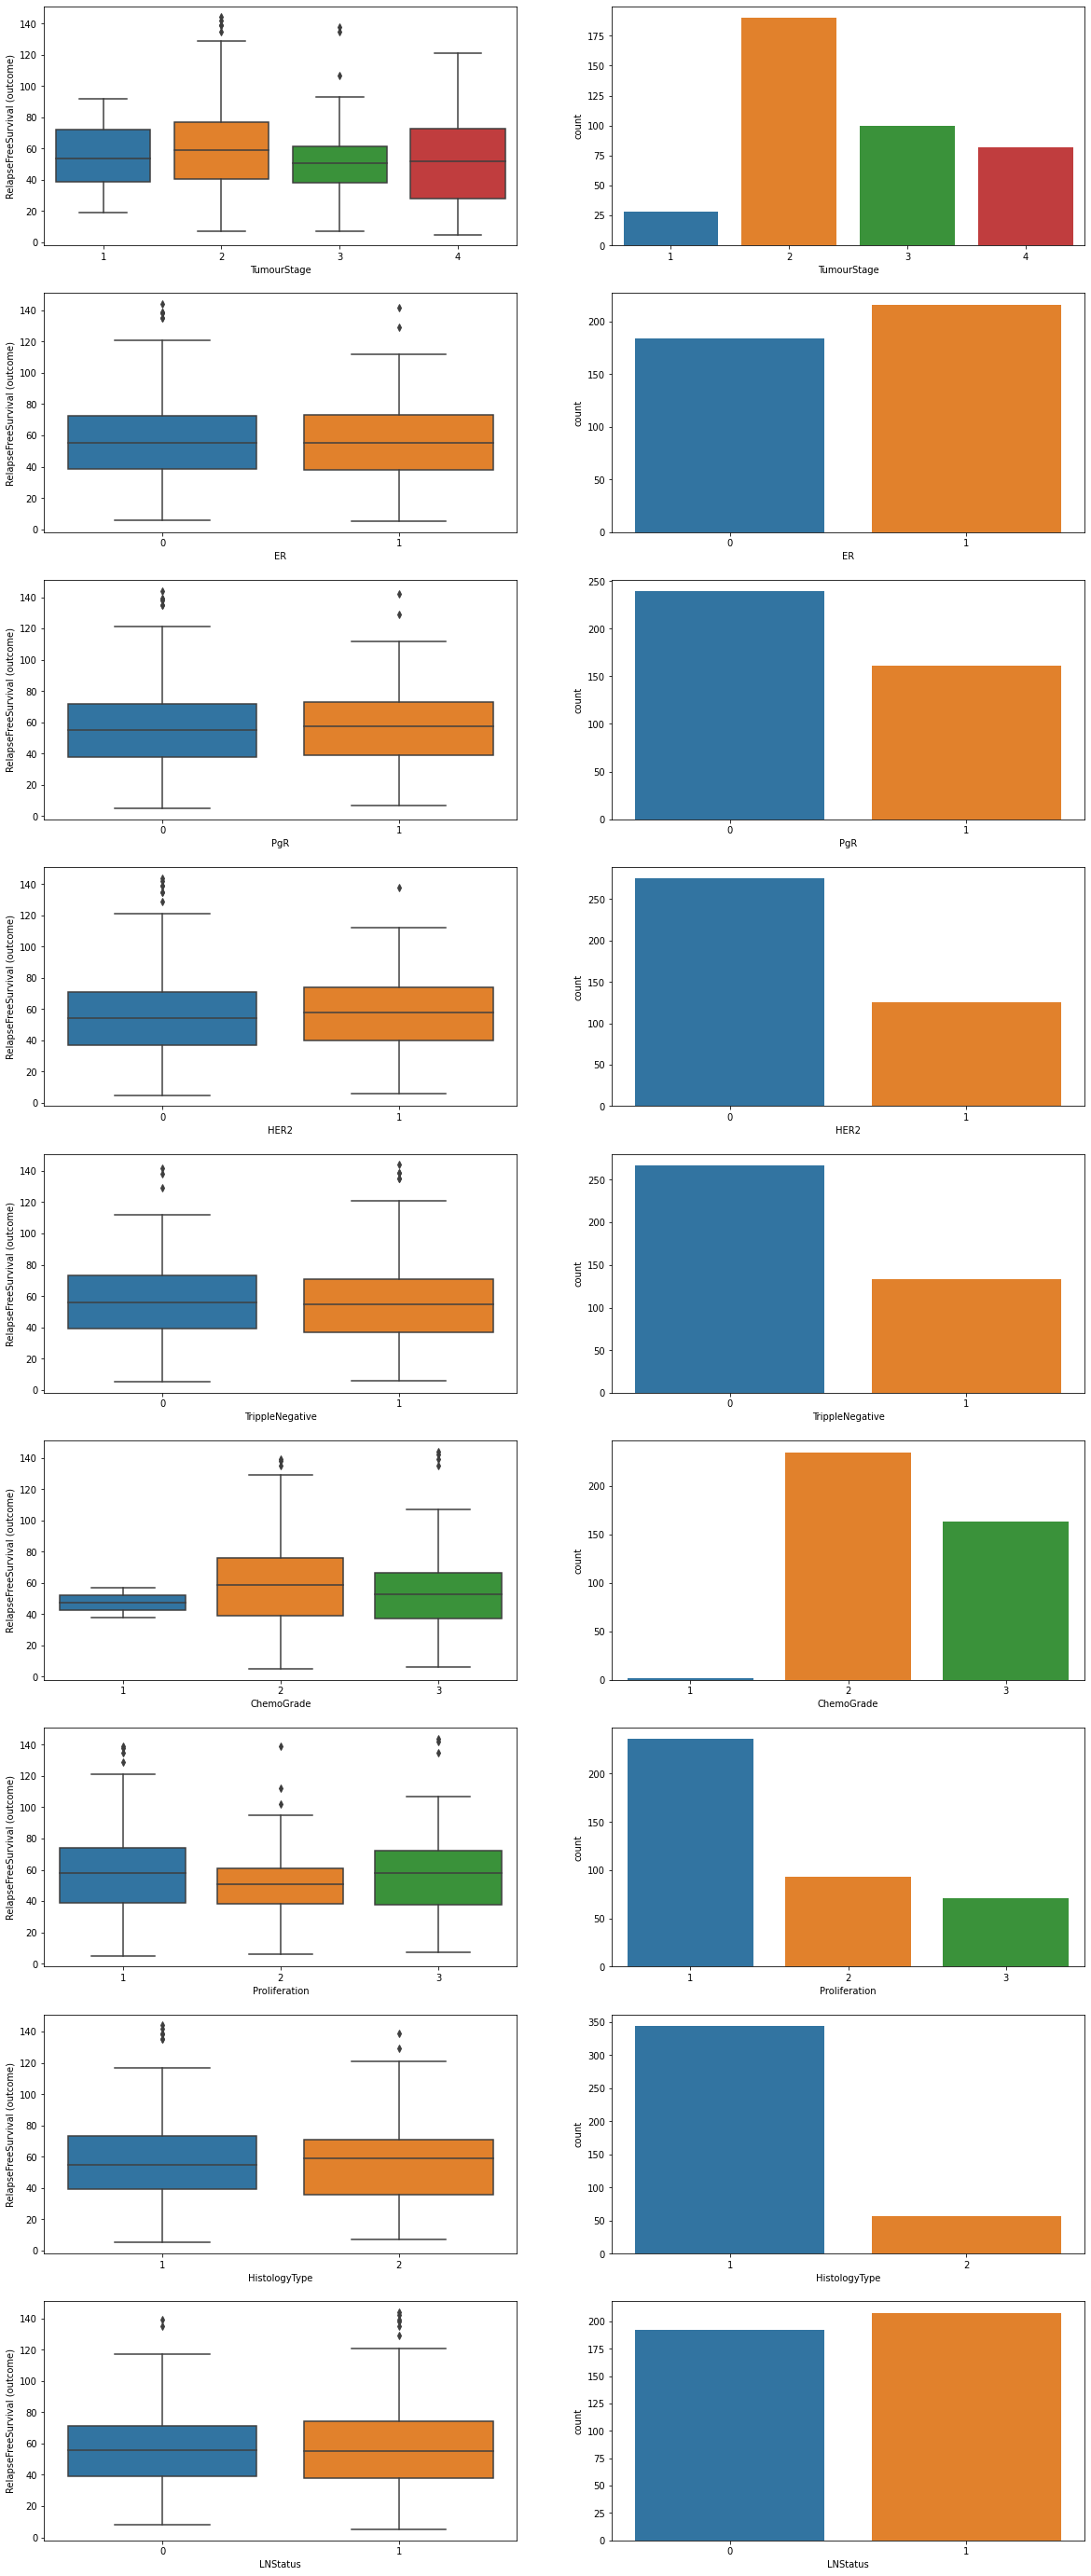

In [18]:
# The distribuion of RFS with respect to categorical features and the frequency of classes
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(20,50))
fig.subplots_adjust(hspace =.2, wspace=.2)
for i, col in enumerate(df.columns[1:10]):
    sns.boxplot(y='RelapseFreeSurvival (outcome)', x=col, data = df, ax=axes[i][0])
    sns.countplot(x=col, data = df, ax=axes[i][1])

In [19]:
# fig, ax = plt.subplots(nrows=20, ncols=6, figsize=(300,560))
# fig.subplots_adjust(hspace =.2, wspace=.2)
# ax = ax.ravel()
# for i, col in enumerate(X.columns[1:]):
#     ax[i].plot(X[col],y,'or',markersize = 15)

<h1>Feature Selection</h1>

<h2>Correlation Matrix</h2>

<h3>Kendall</h3>

In [20]:
# Kendall's correlation on the continous features
corrMat_kendall = df.iloc[:,10:].corr(method = 'kendall')
corrMat_kendall = pd.DataFrame(corrMat_kendall)
corrMat_kendall.sort_values(by = 'RelapseFreeSurvival (outcome)',ascending = False,inplace = True)
corr_kendall = pd.DataFrame(corrMat_kendall['RelapseFreeSurvival (outcome)'])
corr_kendall.reset_index(inplace=True)
corr_kendall.head()

,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,original_glszm_SizeZoneNonUniformityNormalized,0.084781
2,original_shape_Sphericity,0.079465
3,original_ngtdm_Coarseness,0.061385
4,original_glszm_ZonePercentage,0.061216


In [21]:
# Choosing significant features with 0.05 as cutoff
kendall_sig = corr_kendall[(corr_kendall['RelapseFreeSurvival (outcome)']>0.05) | (corr_kendall['RelapseFreeSurvival (outcome)']<-0.05)]
kendall_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)
kendall_sig.head()

<ipython-input-21-11ed2f5fb77e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kendall_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)


,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,original_glszm_SizeZoneNonUniformityNormalized,0.084781
2,original_shape_Sphericity,0.079465
3,original_ngtdm_Coarseness,0.061385
4,original_glszm_ZonePercentage,0.061216


<h3>Pearson</h3>

In [22]:
# Pearson's correlation on the continous features
corrMatt = df.iloc[:,10:].corr()
corrMat = pd.DataFrame(corrMatt)
corrMat.sort_values(by = 'RelapseFreeSurvival (outcome)',ascending = False,inplace = True)
corr = corrMat['RelapseFreeSurvival (outcome)']
corr = pd.DataFrame(corrMat_kendall['RelapseFreeSurvival (outcome)'])
corr.reset_index(inplace=True)
corr.head()

,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,original_glszm_SizeZoneNonUniformityNormalized,0.084781
2,original_shape_Sphericity,0.079465
3,original_ngtdm_Coarseness,0.061385
4,original_glszm_ZonePercentage,0.061216


In [23]:
# Choosing significant features with 0.05 as cutoff
corr_sig = corr[(corr['RelapseFreeSurvival (outcome)']>0.05) | (corr['RelapseFreeSurvival (outcome)']<-0.05)]
corr_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)
corr_sig.head()

<ipython-input-23-4cb028e0df97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)


,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,original_glszm_SizeZoneNonUniformityNormalized,0.084781
2,original_shape_Sphericity,0.079465
3,original_ngtdm_Coarseness,0.061385
4,original_glszm_ZonePercentage,0.061216


<h3>Plotting significant features with Kendall's correlation</h3>

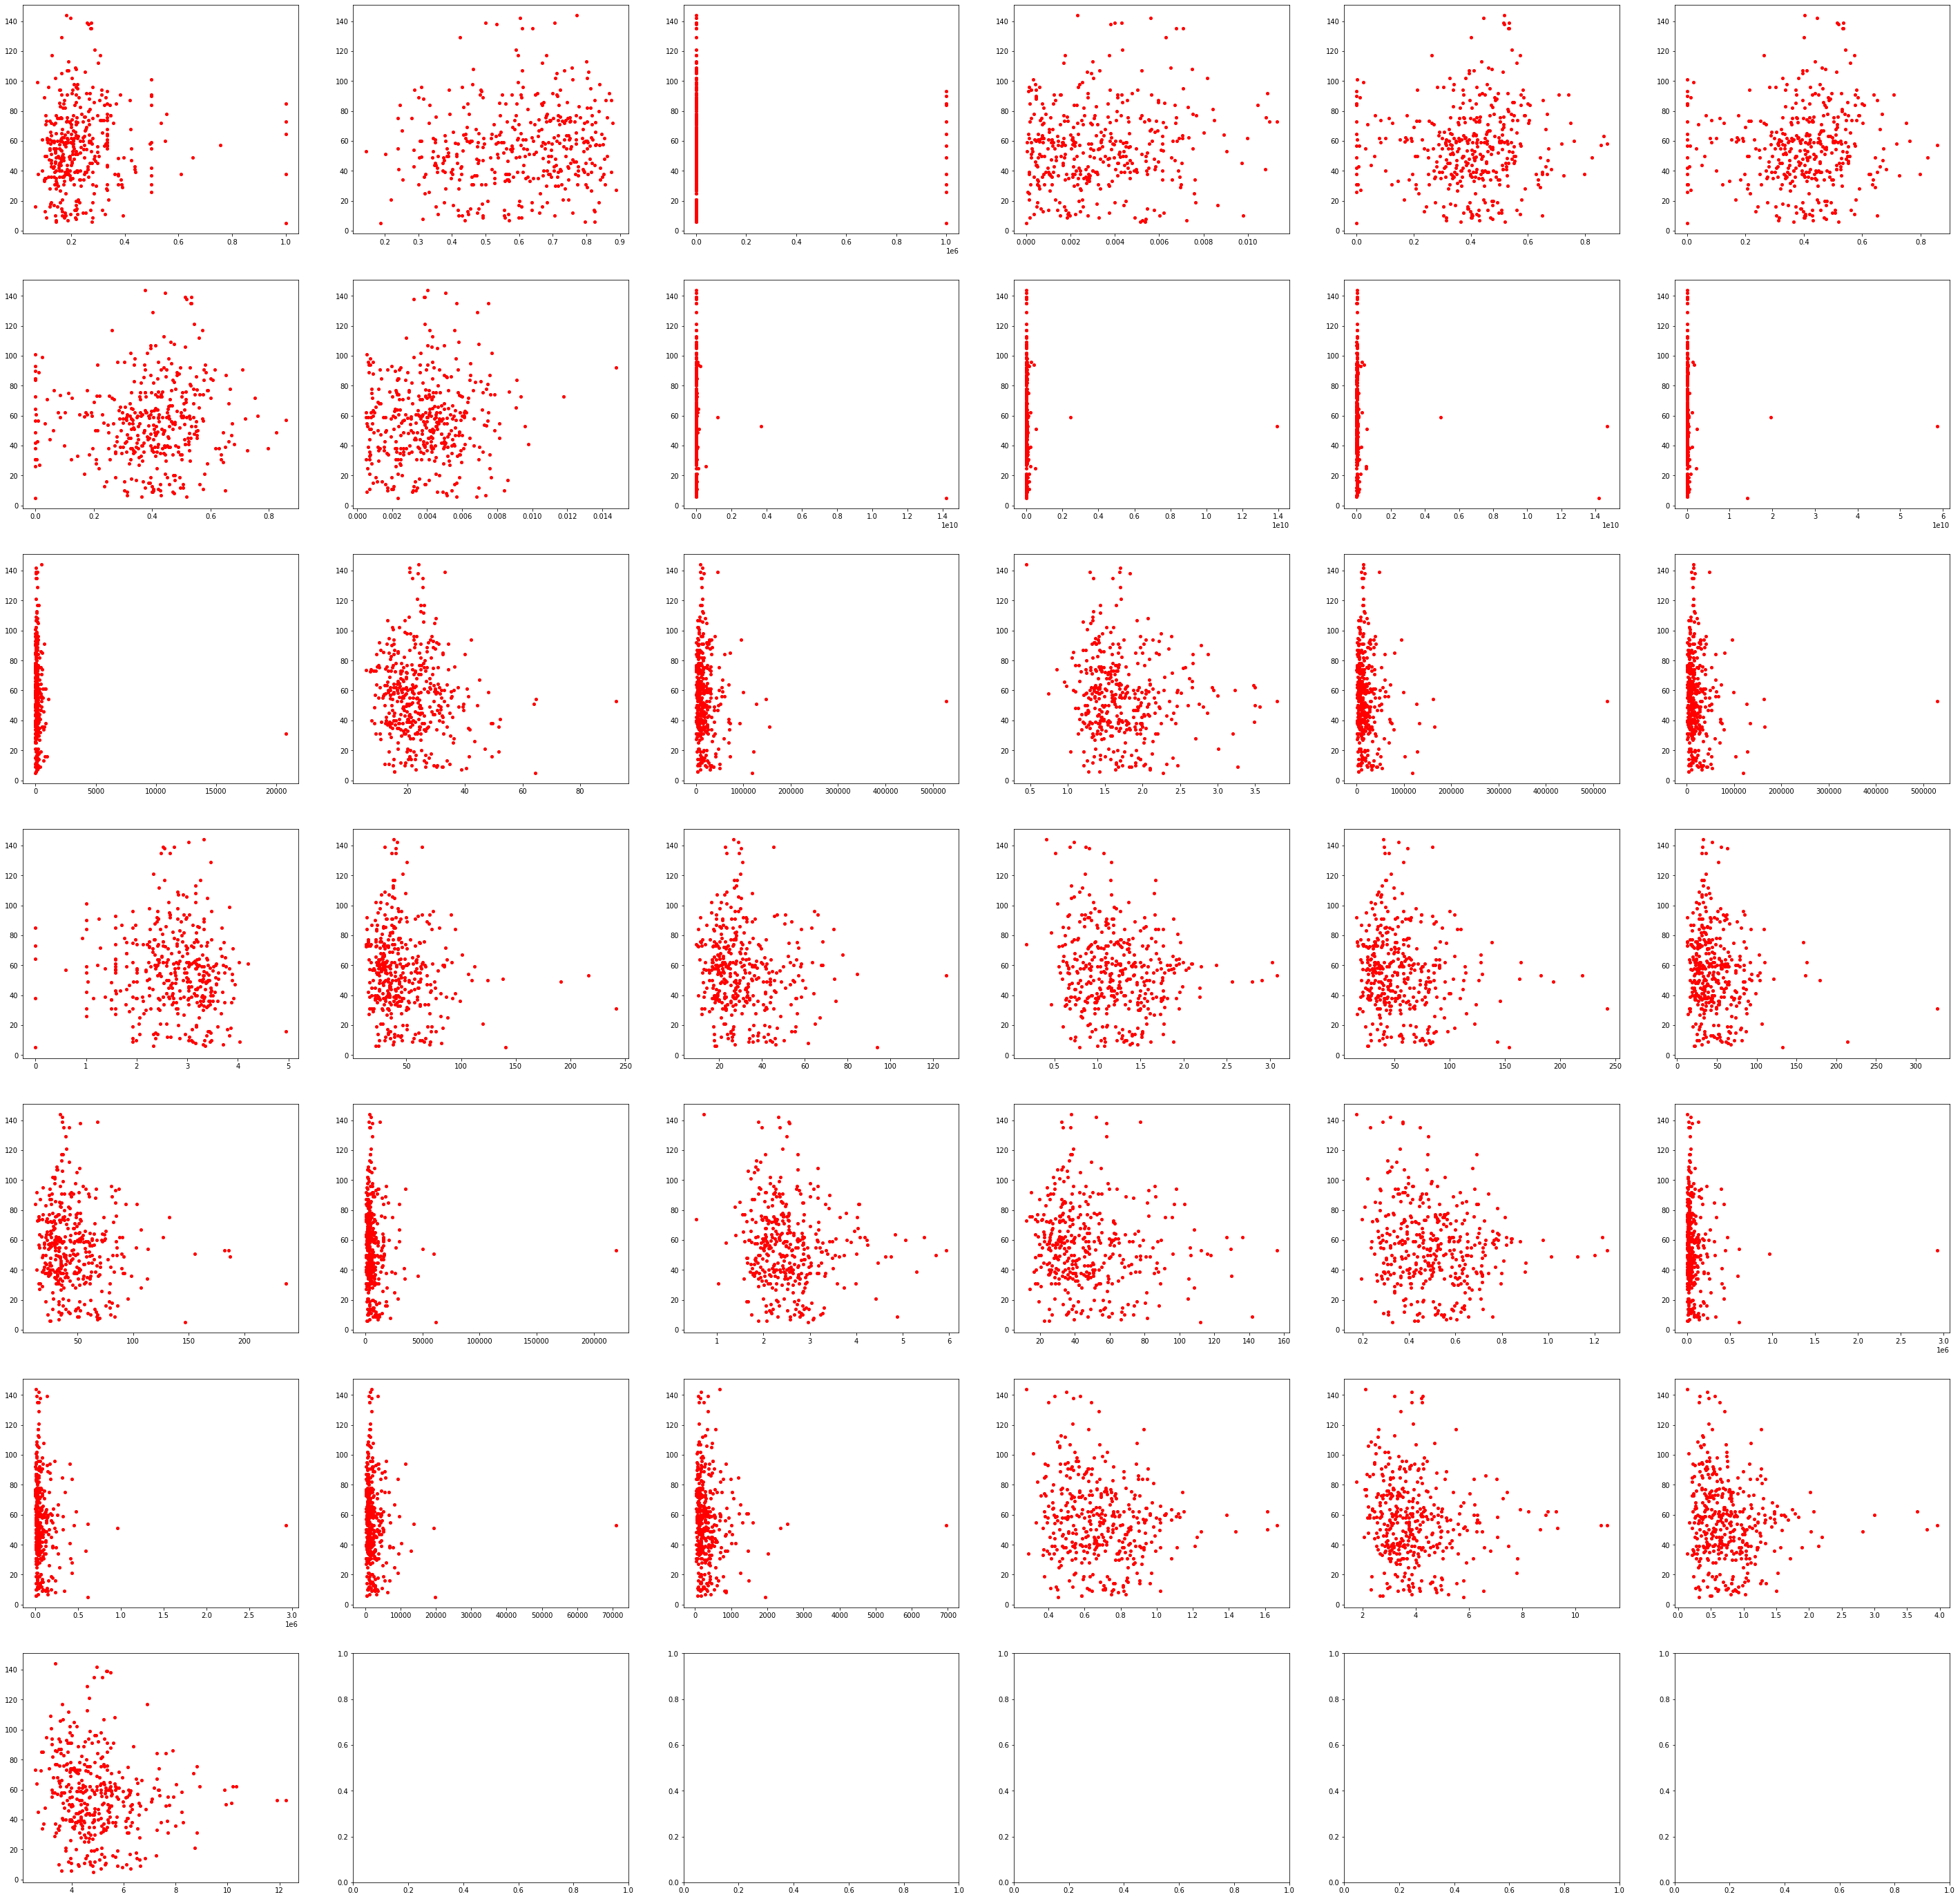

In [24]:
fig, ax = plt.subplots(nrows=len(kendall_sig['index'])//6 + 1, ncols=6, figsize=(50,50))
fig.subplots_adjust(hspace =.2, wspace=.2)
ax = ax.ravel()
for i, col in enumerate(kendall_sig['index'][1:]):
    ax[i].plot(X[col],y,'or',markersize = 4)

<h3>Plotting significant features with Pearson's correlation</h3>

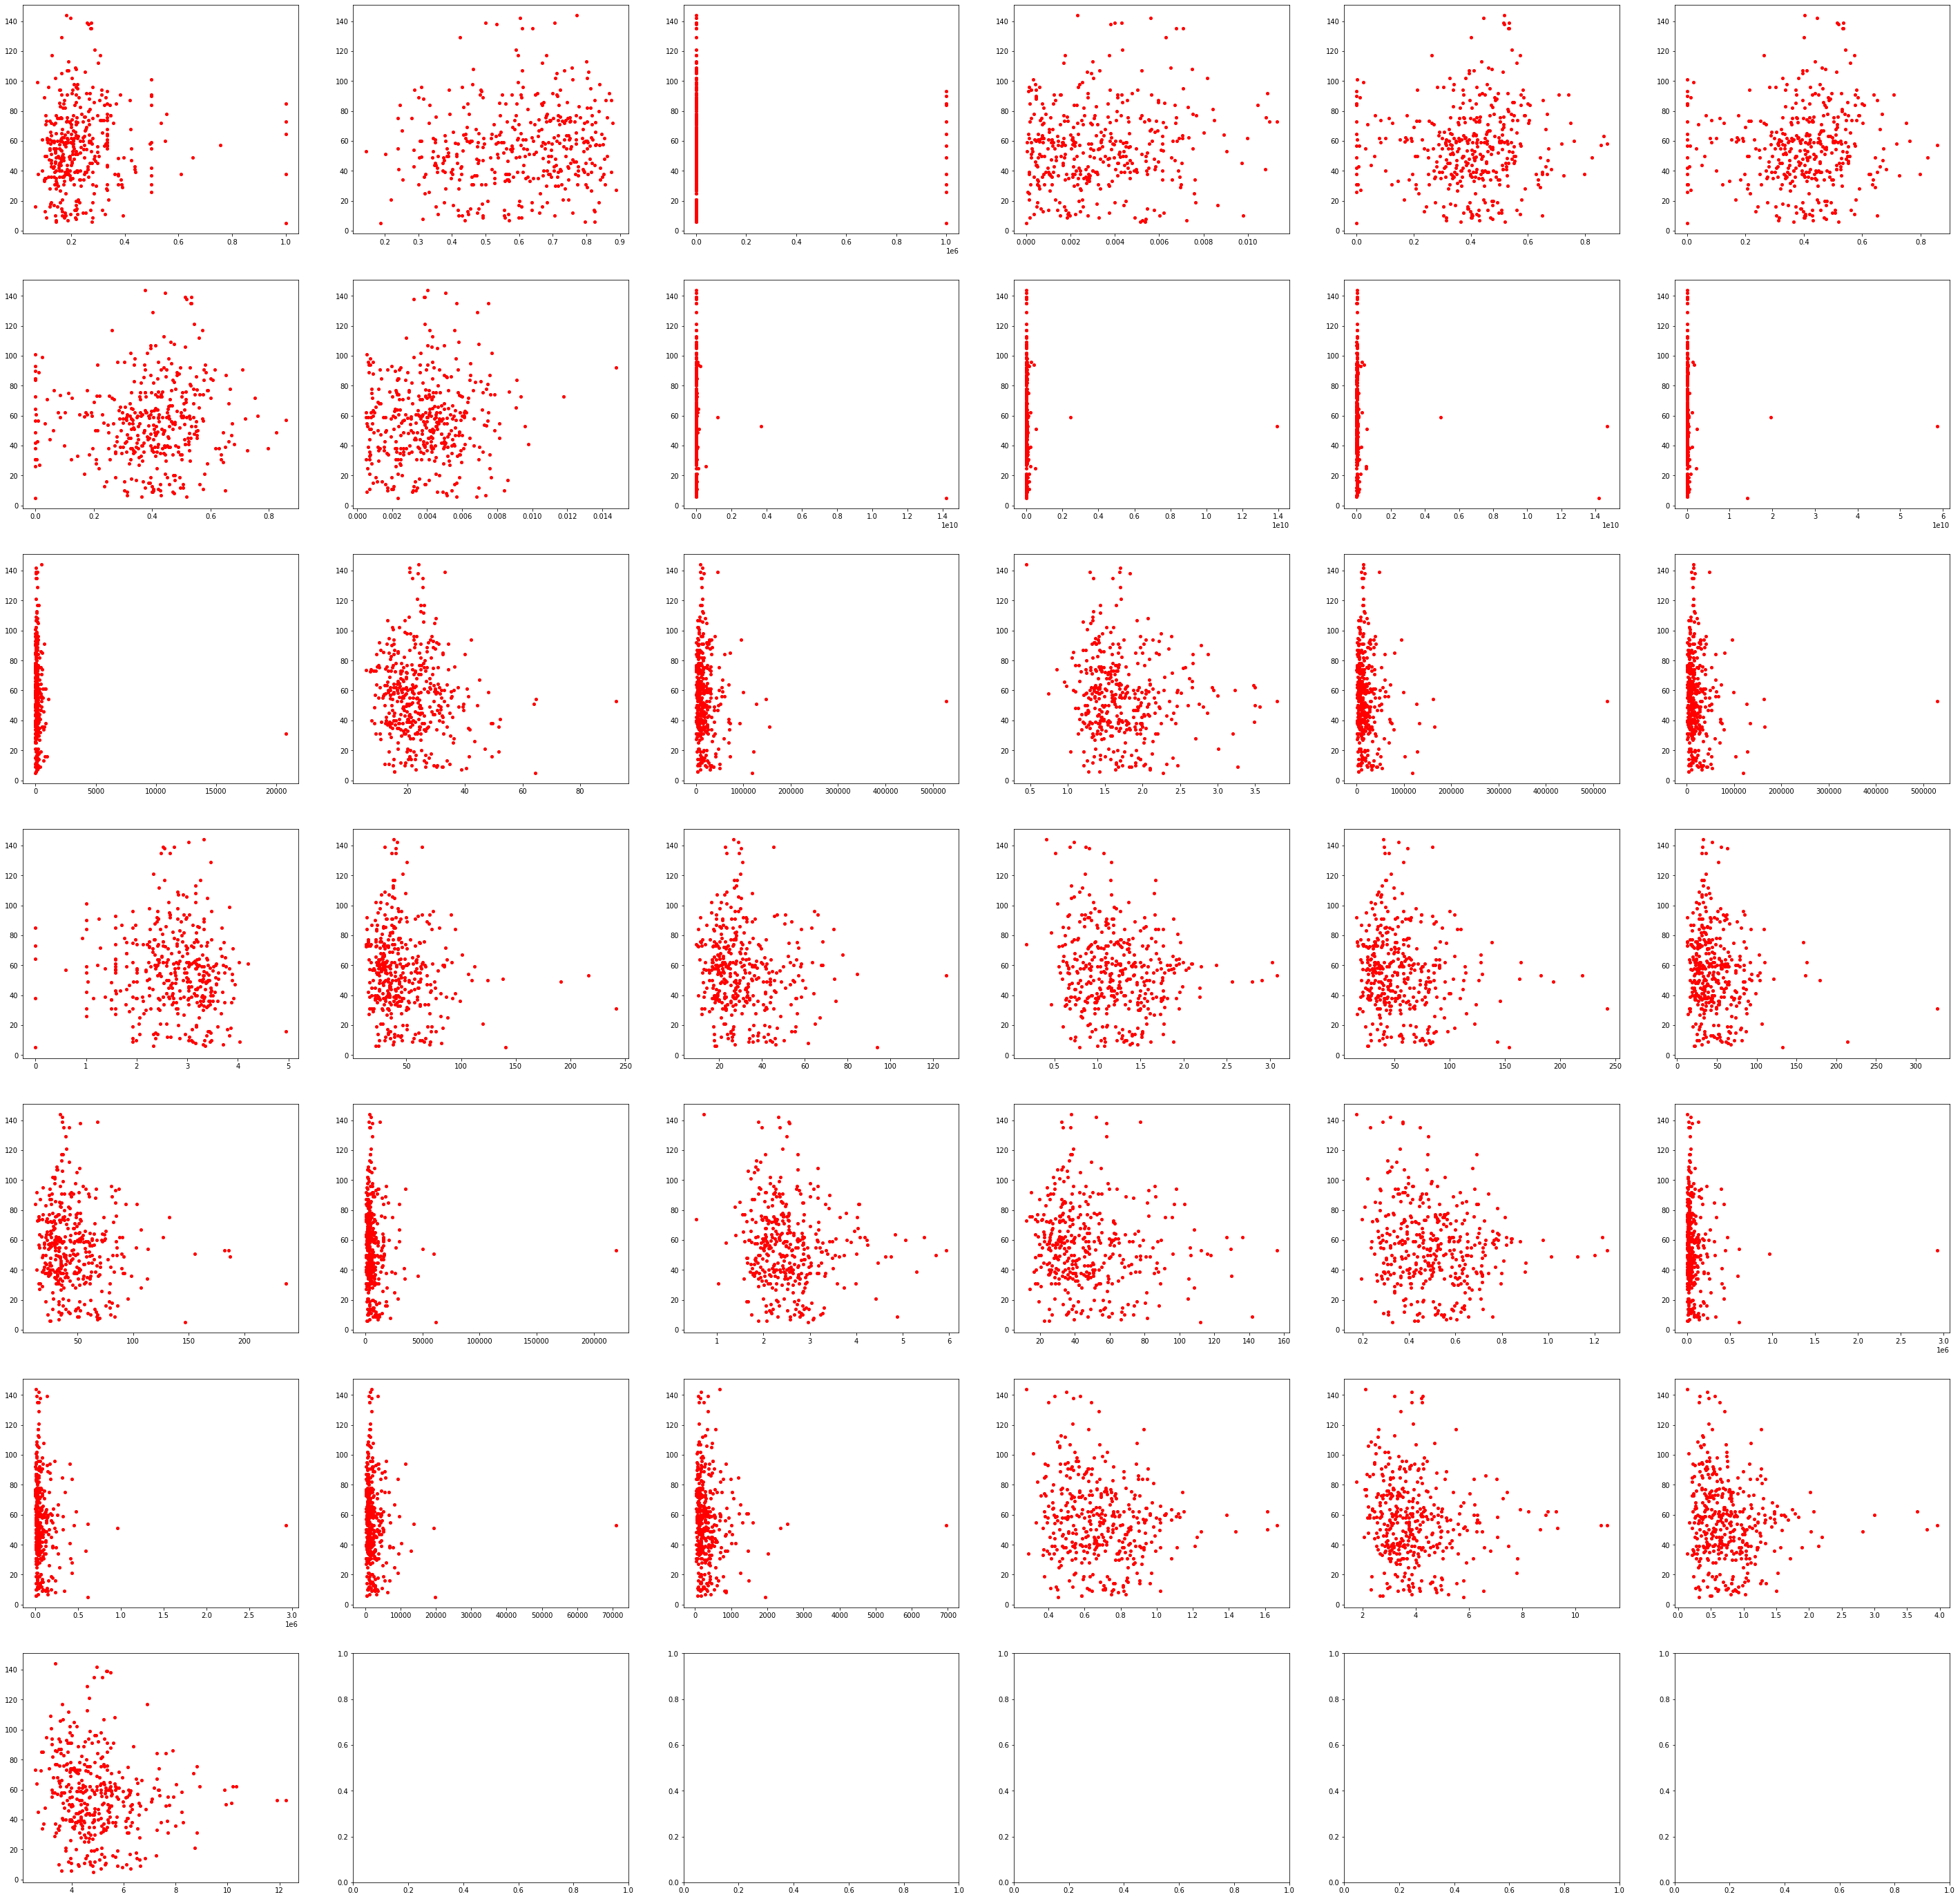

In [25]:
fig, ax = plt.subplots(nrows=len(corr_sig['index'])//6 + 1, ncols=6, figsize=(50,50))
fig.subplots_adjust(hspace =.2, wspace=.2)
ax = ax.ravel()
for i, col in enumerate(corr_sig['index'][1:]):
    ax[i].plot(X[col],y,'or',markersize = 4)

<h1>Dimensionality Reduction</h1>

In [26]:
y = pd.DataFrame(df['RelapseFreeSurvival (outcome)'])
X = df.drop(['RelapseFreeSurvival (outcome)','ID'],axis = 1)
X.head()

,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,2,0,0,0,1,3,3,1,1,41.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.438760,0.184265,0.4078

In [29]:
X_img = X.iloc[:,10:]
X_img.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.438760,0.184265,0.407895,0.184265,0.685680,0.149585,0.907867,0.907867,0.963147,0.938578,-0.149786,0.425720,0.184265,1.806982,0.538903,1.3

In [30]:
# TSNE dimensionality reduction
from sklearn.manifold import TSNE
X_img = TSNE(n_components=30,method='exact').fit_transform(X_img)
print(X.shape,y.shape)

C:\Users\Rohit Varre\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rohit Varre\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(400, 117) (400, 1)


In [31]:
X_img = pd.DataFrame(X_img)
X_img.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.095412,-0.043167,-0.038556,0.354393,0.129194,-0.277249,-0.090402,-0.085801,0.028345,0.089862,-0.077372,-0.073846,-0.031208,0.032889,0.304501,-0.015939,0.175335,0.034047,0.059518,0.146870,-0.190247,-0.243948,-0.119341,0.065619,0.330170,-0.202598,-0.250808,0.021306,-0.054672,-0.130364
std,3.702329,5.616040,2.582680,5.818556,4.280447,3.285017,2.007892,2.493623,1.568995,5.549795,2.398903,2.967167,2.686504,2.177696,7.149423,2.654615,2.685772,2.127072,3.024288,3.045823,3.487667,3.198361,2.032564,2.798338,5.603261,3.461781,6.471207,3.324143,3.896654,4.482089
min,-30.093414,-46.929989,-26.238028,-35.952438,-23.942200,-46.081295,-15.234109,-34.451111,-6.293139,-52.676712,-28.922773,-21.389736,-23.010401,-14.325482,-34.862087,-39.358009,-9.366155,-13.781362,-17.501400,-28.918873,-49.536831,-50.721294,-23.580210,-23.610922,-14.240807,-52.724373,-116.990685,-45.248234,-56.729347,-60.267414
25%,-1.135292,-1.448092,-0.691598,-1.051478,-0.939479,-0.754706,-0.754388,-0.967809,-0.630464,-0.904830,-0.843102,-0.810656,-0.796608,-0.642488,-1.294217,-0.755044,-1.106294,-0.892160,-1.105756,-0.822652,-0.768448,-0.662385,-0.775799,-0.586591,-0.704057,-0.906328,-1.006421,-1.415777,-1.301025,-0.655219
50%,-0.178297,-0.091893,0.003425,0.280451,0.019675,-0.013901,-0.002494,0.012858,-0.058640,0.012678,-0.018688,0.067893,0.172584,-0.055952,-0.229526,-0.004741,0.147404,-0.088293,0.145635,-0.110647,-0.039189,0.017811,-0.028970,0.066238,0.022243,-0.035948,0.049622,0.070249,0.009720,0.017084
75%,1.418682,1.606034,0.706166,1.029567,1.023624,0.827069,0.682985,0.874645,0.504928,1.152101,0.762172,0.878561,0.760215,0.699317,1.359435,0.550088,1.329783,0.905309,1.208430,0.846576,0.542349,0.739628,0.665809,0.686636,0.719192,0.724862,0.930700,1.103656,1.112705,0.802325
max,39.498985,88.750481,17.212515,80.351738,72.510963,8.763405,11.782222,14.235623,9.053720,89.883354,14.369411,29.745649,20.149307,19.184174,129.037445,13.361239,30.115288,17.017504,34.427135,32.026649,14.700156,8.107259,5.052626,32.922298,78.551491,11.364654,17.874729,20.206137,20.298119,33.096542


In [32]:
X_img.insert(0,'RelapseFreeSurvival (outcome)',df['RelapseFreeSurvival (outcome)'])
X_img.head()

,RelapseFreeSurvival (outcome),0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,144.0,2.953164,0.050169,-0.465937,-0.116939,-4.237844,0.555928,0.832829,-2.173651,-0.510165,0.599779,0.146796,2.409877,-0.303238,2.782093,-1.293947,-0.005511,-1.469588,0.024949,1.853467,-0.110938,-1.058388,-0.050117,-3.543226,0.066284,-1.657109,1.313591,0.881042,-2.499641,0.092589,0.122388
1,142.0,2.514907,-1.671915,-0.203938,0.965032,-0.652719,-2.426733,0.735701,-2.448115,-1.693839,-3.379693,-0.403111,0.543777,0.470180,0.206853,-0.551294,-0.525789,0.657561,-2.334500,0.168326,-1.064655,-0.361241,1.074494,1.583652,-0.727430,-1.312512,1.427668,0.426347,-2.085749,-2.917255,0.687749
2,135.0,-1.160108,-3.869048,1.432931,0.999378,-0.322726,-1.785342,0.937268,-0.266140,0.292262,-1.998788,0.134069,-2.842149,0.591085,-1.507040,-1.804416,-1.177992,1.370304,-1.752080,-0.250846,-0.477307,-0.104713,3.137180,-0.256542,3.997935,-0.611819,-0.053056,-1.159110,-0.235892,-1.730956,1.555876
3,12.0,1.111506,2.147065,-0.709204,-1.139873,-0.666542,-0.847541,0.690337,1.760866,1.171693,2.551517,-1.082419,0.599562,-1.025439,1.773453,1.788844,1.522440,-2.512589,0.692672,0.569315,-3.232483,-0.811979,-2.438117,2.313271,0.523233,1.182335,0.539384,-0.092510,-1.783326,2.088733,-0.293355
4,109.0,1.420562,-0.675830,1.996725,0.552408,0.369582,-1.101648,-0.331255,0.316559,0.504940,-0.432405,-2.240400,0.378301,0.403601,-1.525917,-2.056403,0.274745,0.899581,1.970164,-0.944628,0.706656,-0.425168,0.376704,0.338986,0.018824,0.159249,-0.934417,-1.249755,-2.104626,-2.892823,-0.376440


In [33]:
# Kendall's correlation on reduced dimensions
corrMat_kendall = X_img.corr(method = 'kendall')
corrMat_kendall = pd.DataFrame(corrMat_kendall)
corrMat_kendall.sort_values(by = 'RelapseFreeSurvival (outcome)',ascending = False,inplace = True)
corr_kendall = pd.DataFrame(corrMat_kendall['RelapseFreeSurvival (outcome)'])
corr_kendall.reset_index(inplace=True)
corr_kendall.head()

,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,23,0.093662
2,1,0.076017
3,3,0.075916
4,14,0.075387


In [34]:
# Significant features with 0.01 as cutoff for Kendall's correlation
kendall_sig = corr_kendall[(corr_kendall['RelapseFreeSurvival (outcome)']>0.01) | (corr_kendall['RelapseFreeSurvival (outcome)']<-0.02)]
kendall_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)
kendall_sig.head()

<ipython-input-34-6fc7a09e25b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kendall_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)


,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,23,0.093662
2,1,0.076017
3,3,0.075916
4,14,0.075387


In [85]:
len(kendall_sig)

20

<h3>Plotting reduced dimention features with Kendall's correlation</h3>

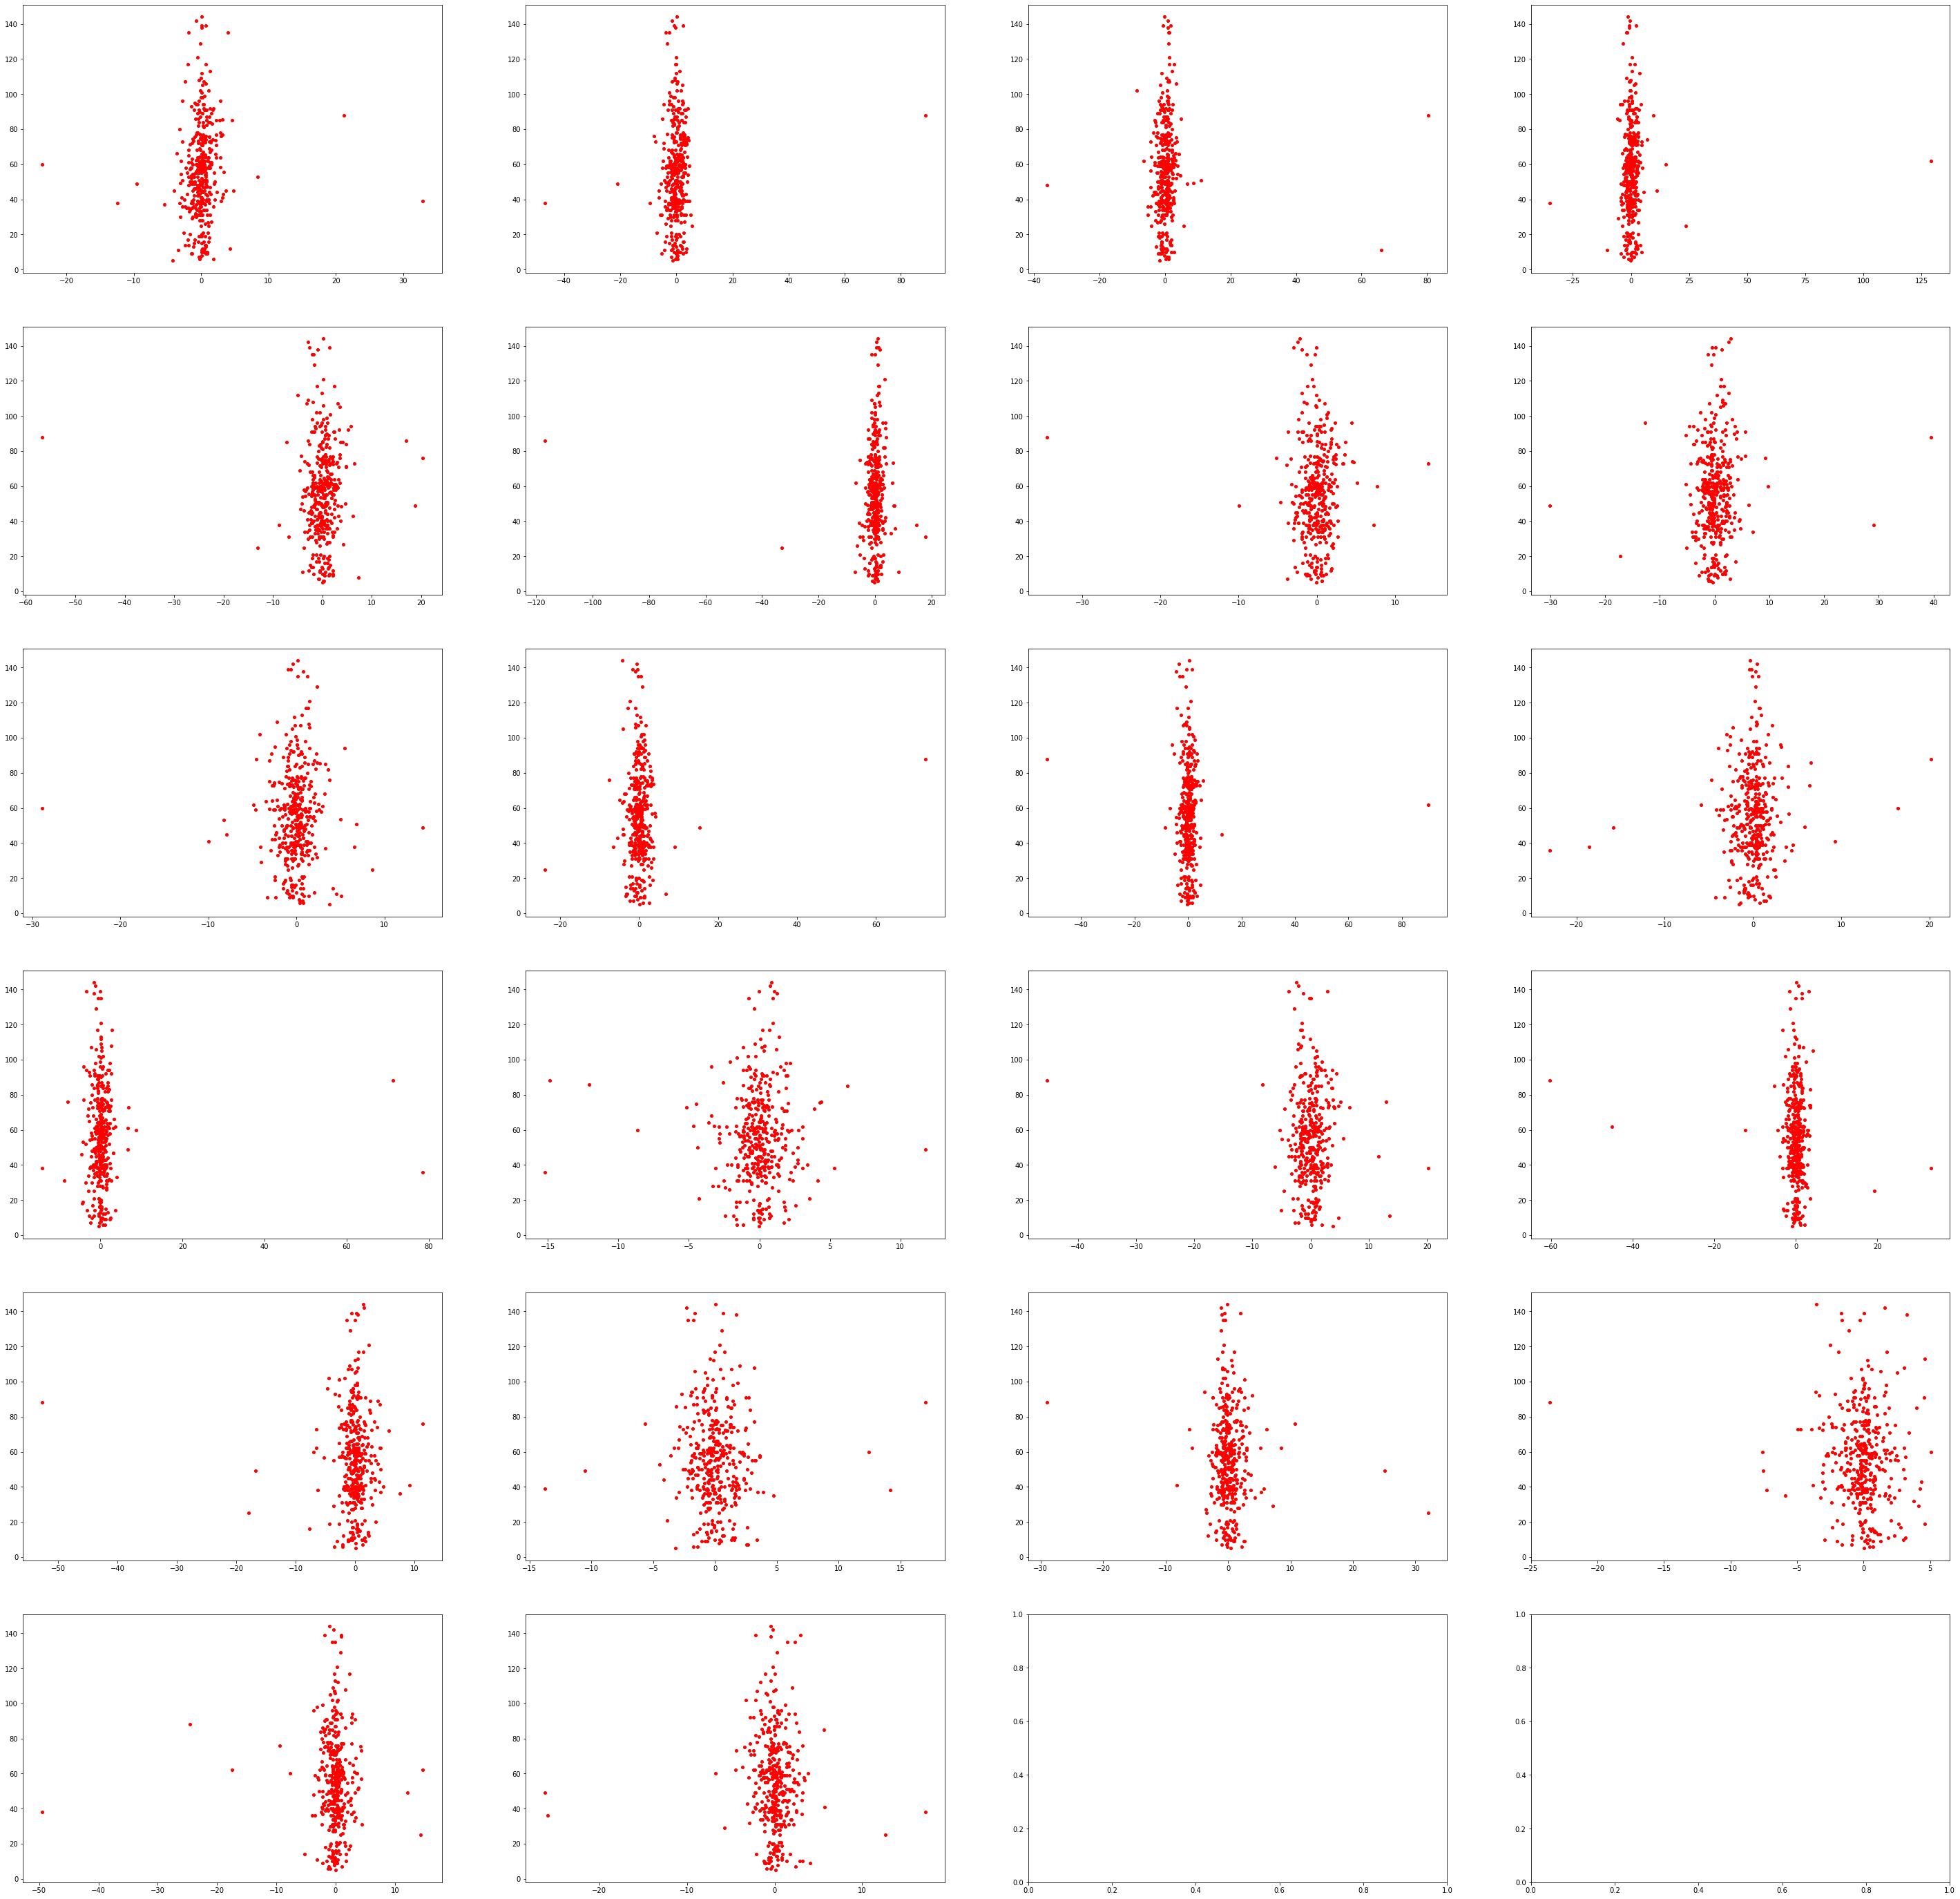

In [35]:
fig, ax = plt.subplots(nrows=len(kendall_sig['index'])//4+1, ncols=4, figsize=(50,50))
fig.subplots_adjust(hspace =.2, wspace=.2)
ax = ax.ravel()
for i, col in enumerate(kendall_sig['index'][1:]):
    ax[i].plot(X_img[col],X_img['RelapseFreeSurvival (outcome)'],'or',markersize = 4)

<h1>Models</h1>

<h2>Random Forest</h2>

In [36]:
X.head()

,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,2,0,0,0,1,3,3,1,1,41.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.438760,0.184265,0.4078

In [37]:
# X = np.array(X.iloc[:,1:])
# y = np.array(y)
# print(X.shape,y.shape)

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [39]:
print(x_train.shape,y_train.shape)

(320, 117) (320, 1)


In [265]:
# Hyperparameter tuning for Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 20],
    'max_features': [100, 117],
    'min_samples_leaf': [10, 20],
    'min_samples_split': [10, 20],
    'n_estimators': [500,600,700]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
rf = grid_search.best_estimator_
rf_pred = rf.predict(x_test)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, rf_pred)
print(mae)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\Rohit Varre\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True, 'max_depth': 5, 'max_features': 117, 'min_samples_leaf': 20, 'min_samples_split': 10, 'n_estimators': 700}
21.62414308049147


In [266]:
# Random Forest model
rf = RandomForestRegressor(n_estimators = 600, max_depth = 5, min_samples_leaf = 10, min_samples_split = 10)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, rf_pred)
print(mae)

<ipython-input-266-64d5ec61699b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


21.492544037321046


In [272]:
feature_list = list(x_train.columns)

In [273]:
# Random Forest feature importance
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, importance) for feature, importance in zip(x_train.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feat_import = pd.DataFrame(feature_importances)
feat_import.head(10)

,0,1
0,original_firstorder_Range,0.099796
1,original_firstorder_Kurtosis,0.073500
2,original_firstorder_Variance,0.044930
3,original_firstorder_90Percentile,0.041581
4,original_glszm_SizeZoneNonUniformity,0.037566
5,original_glszm_ZonePercentage,0.030034
6,original_glrlm_ShortRunHighGrayLevelEmphasis,0.022460
7,original_firstorder_InterquartileRange,0.022224
8,original_firstorder_MeanAbsoluteDeviation,0.021568
9,original_shape_Elongation,0.021172


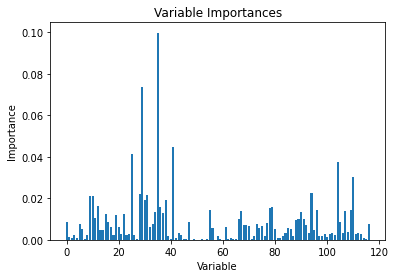

In [274]:
# Plotting the feature importance
import matplotlib.pyplot as plt
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [275]:
from sklearn.metrics import mean_absolute_error 
prediction = rf.predict(x_test)
mae = mean_absolute_error(y_test, prediction)
print(mae)

21.492544037321046


<h2>ANN</h2>

In [276]:
scaler = RobustScaler()
x_scaled = scaler.fit_transform(X)
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x_scaled)
print(x.shape)

(400, 117)


In [277]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [278]:
x_test.shape

(80, 117)

In [279]:
# ANN architecture
model = Sequential([
    
    Dense(units = 240, input_shape = (117,), activation = 'relu'),
    Dropout(0.2),
    Dense(units = 480, activation = 'relu'),
    Dense(units = 480, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)),
    Dense(units = 240, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(units = 120, activation = 'relu'),
    Dense(units = 1, activation = 'relu'),
    
])
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_158 (Dense)            (None, 240)               28320     
_________________________________________________________________
dropout_40 (Dropout)         (None, 240)               0         
_________________________________________________________________
dense_159 (Dense)            (None, 480)               115680    
_________________________________________________________________
dense_160 (Dense)            (None, 480)               230880    
_________________________________________________________________
dense_161 (Dense)            (None, 240)               115440    
_________________________________________________________________
dropout_41 (Dropout)         (None, 240)               0         
_________________________________________________________________
dense_162 (Dense)            (None, 120)             

In [280]:
model.compile(optimizer=SGD(learning_rate=0.1), loss='mean_absolute_error')
history = model.fit(x=x_train,y=y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=32)

Epoch 1/100
8/8 - 0s - loss: 128.5798 - val_loss: 75.6247
Epoch 2/100
8/8 - 0s - loss: 76.5871 - val_loss: 74.0120
Epoch 3/100
8/8 - 0s - loss: 74.2244 - val_loss: 56.0223
Epoch 4/100
8/8 - 0s - loss: 148.8627 - val_loss: 84.9345
Epoch 5/100
8/8 - 0s - loss: 85.7342 - val_loss: 82.9352
Epoch 6/100
8/8 - 0s - loss: 83.4634 - val_loss: 79.9528
Epoch 7/100
8/8 - 0s - loss: 75.6132 - val_loss: 320.7809
Epoch 8/100
8/8 - 0s - loss: 117.8517 - val_loss: 83.6541
Epoch 9/100
8/8 - 0s - loss: 84.5051 - val_loss: 81.8140
Epoch 10/100
8/8 - 0s - loss: 82.6996 - val_loss: 80.0181
Epoch 11/100
8/8 - 0s - loss: 80.9701 - val_loss: 78.2765
Epoch 12/100
8/8 - 0s - loss: 79.1990 - val_loss: 76.5831
Epoch 13/100
8/8 - 0s - loss: 77.4938 - val_loss: 74.9304
Epoch 14/100
8/8 - 0s - loss: 75.8463 - val_loss: 73.3345
Epoch 15/100
8/8 - 0s - loss: 74.2563 - val_loss: 71.8151
Epoch 16/100
8/8 - 0s - loss: 72.7181 - val_loss: 70.3339
Epoch 17/100
8/8 - 0s - loss: 71.2252 - val_loss: 68.9034
Epoch 18/100
8/8 - 

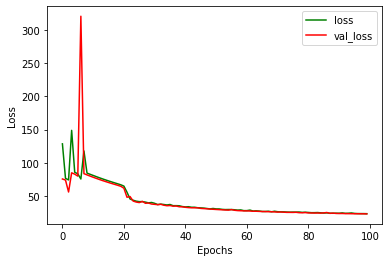

In [281]:
# Loss vs Epochs plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs, loss, 'g', label='loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [282]:
model.evaluate(x=x_test,y=y_test)
y_pred = model.predict(x_test)

3/3 [==============================] - 0s 2ms/step - loss: 19.4845


In [283]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

17.721833817164104
